In [1]:
import os
from glob import glob
from pycocotools.coco import COCO

import matplotlib.pyplot as plt
import numpy as np 

import skimage.io as io
from pprint import pprint
import json

# MSCOCO

- Author: Jaehyuk Heo
- COCO(Common Objects in Context) [ [home](https://cocodataset.org/#home) | [download](https://cocodataset.org/#download) ]

# Sub-Tasks Competitions

Task         | 2015 | 2016 | 2017 | 2018 | 2019 | 2020 
 :---:         |  --- |  --- |  --- |  --- |  --- |  ---
`Detection`  |   O  |   O  |   O  |   O  |   O  |   O 
`Captioning` |   O  |      |      |      |      |
`Keypoints`  |      |   O  |   O  |   O  |   O  |   O   
`Stuff`      |      |      |   O  |   O  |   O  |    
`Panoptic`   |      |      |      |   O  |   O  |   O 
`DensePose`  |      |      |      |      |      |   O 


# Dataset Releases

2014년에 처음 데이터가 공개되고 이후 평가 데이터 공개와 2017년 전체 데이터에 대한 업데이트가 이뤄짐

- **2014** Train/Val
- **2014** Testing
- **2015** Testing
- **2017** Train/Val/Test
- **2017** Unlabled

2017년부터 열리는 competition은 모두 `2017 Train/Val/Test` 데이터 사용


**Dataset Usages**

Images | 이미지 수 (용량) | Annotations | 이미지 수 (용량) 
:--- | :--- | :--- | :---
`2014 Train images` | [83K/13GB] | `2014 Train/Val annotations` | [241MB]
`2014 Val images` | [41K/6GB] | `2014 Testing Image info` | [1MB]
`2014 Test images` | [41K/6GB] | `2015 Testing Image info` | [2MB]
`2015 Test images` | [81K/12GB] | `2017 Train/Val annotations` | [241MB]
`2017 Train images` | [118K/18GB] | `2017 Stuff Train/Val annotations` | [1.1GB]
`2017 Val images` | [5K/1GB] | `2017 Panoptic Train/Val annotations` | [821MB]
`2017 Test images` | [41K/6GB] | `2017 Testing Image info` | [1MB]
`2017 Unlabeled images` | [123K/19GB] | `2017 Unlabeled Image info` | [4MB]










In [2]:
!tree -d /datasets/MSCOCO

/datasets/MSCOCO
├── annotations
├── deprecated-challenge2017
├── images
│   ├── panoptic_train2017
│   ├── panoptic_val2017
│   ├── stuff_train2017_pixelmaps
│   ├── stuff_val2017_pixelmaps
│   ├── test2014
│   ├── test2015
│   ├── test2017
│   ├── train2014
│   ├── train2017
│   ├── unlabeled2017
│   ├── val2014
│   └── val2017
└── zipfiles

16 directories


In [3]:
!tree /datasets/MSCOCO/annotations/

/datasets/MSCOCO/annotations/
├── captions_train2014.json
├── captions_train2017.json
├── captions_val2014.json
├── captions_val2017.json
├── image_info_test-dev2015.json
├── image_info_test-dev2017.json
├── image_info_test2014.json
├── image_info_test2015.json
├── image_info_test2017.json
├── image_info_unlabeled2017.json
├── instances_train2014.json
├── instances_train2017.json
├── instances_val2014.json
├── instances_val2017.json
├── panoptic_train2017.json
├── panoptic_val2017.json
├── person_keypoints_train2014.json
├── person_keypoints_train2017.json
├── person_keypoints_val2014.json
├── person_keypoints_val2017.json
├── stuff_train2017.json
└── stuff_val2017.json

0 directories, 22 files


# COCO API

- COCO dataset을 사용하기 쉽게 python API로 `pycocotools` 제공 [ [github](https://github.com/cocodataset/cocoapi) ]

`ann`=annotation, `cat`=category, `img`=image.

Function | Description
:---|:---
`getAnnIds` | Get ann ids that satisfy given filter conditions. 
`getCatIds` | Get cat ids that satisfy given filter conditions. 
`getImgIds` | Get img ids that satisfy given filter conditions. 
`loadAnns`  | Load anns with the specified ids. 
`loadCats`  | Load cats with the specified ids. 
`loadImgs`  | Load imgs with the specified ids. 
`loadRes`   | Load algorithm results and create API for accessing them. 
`showAnns`  | Display the specified annotations.

**example**

In [4]:
datadir='/datasets/MSCOCO'
datatype='val2017'
annfile=f'{datadir}/annotations/instances_{datatype}.json'

coco = COCO(annfile)
cats = coco.loadCats(coco.getCatIds())

nms=[cat['name'] for cat in cats] 
print('\n=======================\nCOCO categories(n={}):\n======================= \n{}\n'.format(len(nms),' '.join(nms))) 

nms = set([cat['supercategory'] for cat in cats]) 
print('=======================\nCOCO supercategories(n={}):\n======================= \n{}'.format(len(nms),' '.join(nms)))


loading annotations into memory...
Done (t=0.44s)
creating index...
index created!

COCO categories(n=80):
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories(n=12):
kitchen outdoor appliance furniture sports vehicle indoor food electronic person animal accessory


# 1. captions

`image captioning`

**Example**
![](https://cocodataset.org/images/captions-splash.jpg)
    

## Annotation

In [5]:
train2014_cap = json.load(open('/datasets/MSCOCO/annotations/captions_train2014.json','r'))

print(list(train2014_cap.keys()))

print('\n=======\ninfo\n=======')
pprint(train2014_cap['info'])

print('\n=======\nlicences\n=======')
pprint(train2014_cap['licenses'])

print('\n=======\nimages\n=======')
pprint(train2014_cap['images'][0])

print('\n=======\nannotations\n=======')
pprint(train2014_cap['annotations'][0])

['info', 'images', 'licenses', 'annotations']

info
{'contributor': 'COCO Consortium',
 'date_created': '2017/09/01',
 'description': 'COCO 2014 Dataset',
 'url': 'http://cocodataset.org',
 'version': '1.0',
 'year': 2014}

licences
[{'id': 1,
  'name': 'Attribution-NonCommercial-ShareAlike License',
  'url': 'http://creativecommons.org/licenses/by-nc-sa/2.0/'},
 {'id': 2,
  'name': 'Attribution-NonCommercial License',
  'url': 'http://creativecommons.org/licenses/by-nc/2.0/'},
 {'id': 3,
  'name': 'Attribution-NonCommercial-NoDerivs License',
  'url': 'http://creativecommons.org/licenses/by-nc-nd/2.0/'},
 {'id': 4,
  'name': 'Attribution License',
  'url': 'http://creativecommons.org/licenses/by/2.0/'},
 {'id': 5,
  'name': 'Attribution-ShareAlike License',
  'url': 'http://creativecommons.org/licenses/by-sa/2.0/'},
 {'id': 6,
  'name': 'Attribution-NoDerivs License',
  'url': 'http://creativecommons.org/licenses/by-nd/2.0/'},
 {'id': 7,
  'name': 'No known copyright restrictions',
  

# 2. instance

`detection`, `segmentation`

![](https://cocodataset.org/images/detection-splash.png)

In [6]:
datadir='/datasets/MSCOCO'
datatype='val2017'
annfile=f'{datadir}/annotations/instances_{datatype}.json'

# image info
coco = COCO(annfile)
cats = coco.loadCats(coco.getCatIds())
catIds = coco.getCatIds(catNms=['person','dog','skateboard'])
imgIds = coco.getImgIds(catIds=catIds)
img = coco.loadImgs(imgIds[1])[0]
print()
pprint(img)


# annotation
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)

loading annotations into memory...
Done (t=0.47s)
creating index...
index created!

{'coco_url': 'http://images.cocodataset.org/val2017/000000324158.jpg',
 'date_captured': '2013-11-19 23:54:06',
 'file_name': '000000324158.jpg',
 'flickr_url': 'http://farm1.staticflickr.com/169/417836491_5bf8762150_z.jpg',
 'height': 334,
 'id': 324158,
 'license': 1,
 'width': 500}


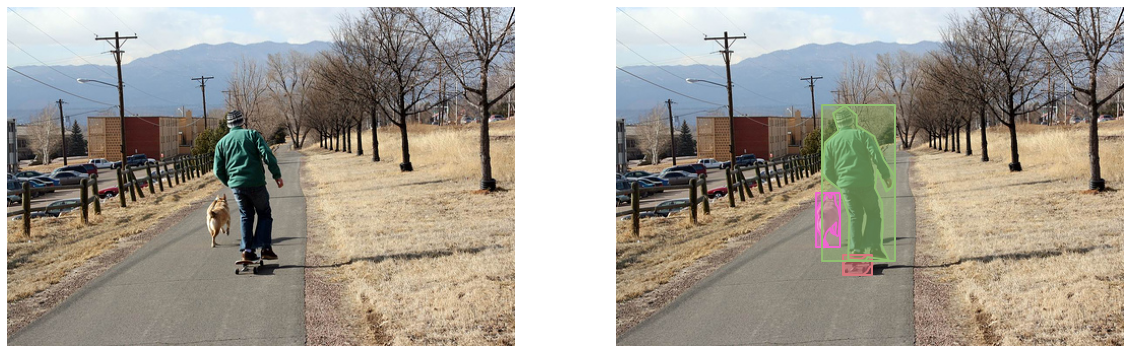

In [7]:
fig, ax = plt.subplots(1,2,figsize=(20,10))

I = io.imread(img['coco_url'])
ax[0].imshow(I)
ax[0].axis('off')
ax[1].imshow(I)
ax[1].axis('off')
coco.showAnns(anns, draw_bbox=True)

In [106]:
train2014_ins = json.load(open('/datasets/MSCOCO/annotations/instances_train2014.json','r'))

print(list(train2014_ins.keys()))

print('\n=======\ninfo\n=======')
pprint(train2014_ins['info'])

print('\n=======\nlicences\n=======')
pprint(train2014_ins['licenses'])

print('\n=======\nimages\n=======')
pprint(train2014_ins['images'][0])

print('\n=======\nannotations\n=======')
pprint(train2014_ins['annotations'][0])

['info', 'images', 'licenses', 'annotations', 'categories']

info
{'contributor': 'COCO Consortium',
 'date_created': '2017/09/01',
 'description': 'COCO 2014 Dataset',
 'url': 'http://cocodataset.org',
 'version': '1.0',
 'year': 2014}

licences
[{'id': 1,
  'name': 'Attribution-NonCommercial-ShareAlike License',
  'url': 'http://creativecommons.org/licenses/by-nc-sa/2.0/'},
 {'id': 2,
  'name': 'Attribution-NonCommercial License',
  'url': 'http://creativecommons.org/licenses/by-nc/2.0/'},
 {'id': 3,
  'name': 'Attribution-NonCommercial-NoDerivs License',
  'url': 'http://creativecommons.org/licenses/by-nc-nd/2.0/'},
 {'id': 4,
  'name': 'Attribution License',
  'url': 'http://creativecommons.org/licenses/by/2.0/'},
 {'id': 5,
  'name': 'Attribution-ShareAlike License',
  'url': 'http://creativecommons.org/licenses/by-sa/2.0/'},
 {'id': 6,
  'name': 'Attribution-NoDerivs License',
  'url': 'http://creativecommons.org/licenses/by-nd/2.0/'},
 {'id': 7,
  'name': 'No known copyright res

# 3. keypoints

`keypoints`

![](https://cocodataset.org/images/keypoints-splash.png)

**Example**

In [27]:
datadir='/datasets/MSCOCO'
datatype='val2017'
annfile = f'{datadir}/annotations/person_keypoints_{datatype}.json'

# image info
coco = COCO(annfile)
cats = coco.loadCats(coco.getCatIds())
catIds = coco.getCatIds(catNms=['person','dog','skateboard'])
imgIds = coco.getImgIds(catIds=catIds)
img = coco.loadImgs(imgIds[1])[0]
print()
pprint(img)


# annotation
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)

loading annotations into memory...
Done (t=0.30s)
creating index...
index created!

{'coco_url': 'http://images.cocodataset.org/val2017/000000458755.jpg',
 'date_captured': '2013-11-16 23:06:51',
 'file_name': '000000458755.jpg',
 'flickr_url': 'http://farm6.staticflickr.com/5119/5878453277_eea657a01d_z.jpg',
 'height': 480,
 'id': 458755,
 'license': 1,
 'width': 640}


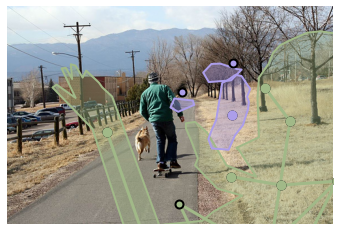

In [29]:
plt.imshow(I)
plt.axis('off')
ax = plt.gca()
coco.showAnns(anns)

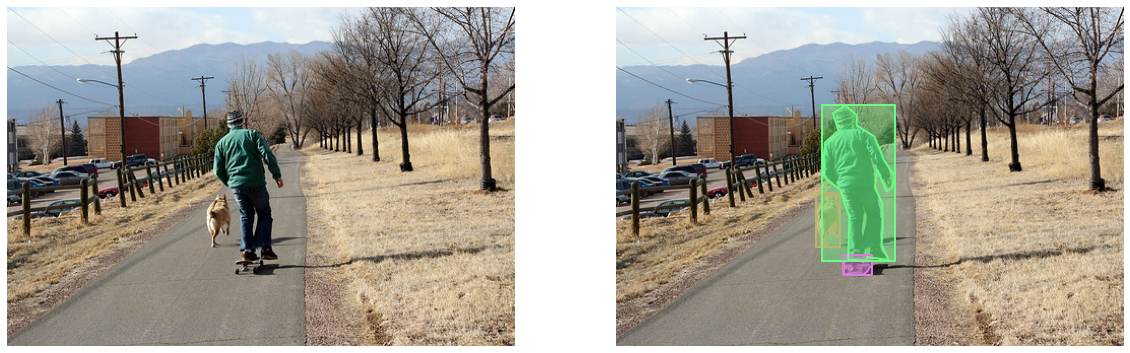

In [25]:
fig, ax = plt.subplots(1,2,figsize=(20,10))

I = io.imread(img['coco_url'])
ax[0].imshow(I)
ax[0].axis('off')
ax[1].imshow(I)
ax[1].axis('off')
coco.showAnns(anns, draw_bbox=True)

In [110]:
train2014_kps = json.load(open('/datasets/MSCOCO/annotations/person_keypoints_train2014.json','r'))

print(list(train2014_kps.keys()))

print('\n=======\ninfo\n=======')
pprint(train2014_kps['info'])

print('\n=======\nlicences\n=======')
pprint(train2014_kps['licenses'])

print('\n=======\nimages\n=======')
pprint(train2014_kps['images'][0])

print('\n=======\nannotations\n=======')
pprint(train2014_kps['annotations'][0])

['info', 'images', 'licenses', 'annotations', 'categories']

info
{'contributor': 'COCO Consortium',
 'date_created': '2017/09/01',
 'description': 'COCO 2014 Dataset',
 'url': 'http://cocodataset.org',
 'version': '1.0',
 'year': 2014}

licences
[{'id': 1,
  'name': 'Attribution-NonCommercial-ShareAlike License',
  'url': 'http://creativecommons.org/licenses/by-nc-sa/2.0/'},
 {'id': 2,
  'name': 'Attribution-NonCommercial License',
  'url': 'http://creativecommons.org/licenses/by-nc/2.0/'},
 {'id': 3,
  'name': 'Attribution-NonCommercial-NoDerivs License',
  'url': 'http://creativecommons.org/licenses/by-nc-nd/2.0/'},
 {'id': 4,
  'name': 'Attribution License',
  'url': 'http://creativecommons.org/licenses/by/2.0/'},
 {'id': 5,
  'name': 'Attribution-ShareAlike License',
  'url': 'http://creativecommons.org/licenses/by-sa/2.0/'},
 {'id': 6,
  'name': 'Attribution-NoDerivs License',
  'url': 'http://creativecommons.org/licenses/by-nd/2.0/'},
 {'id': 7,
  'name': 'No known copyright res

# 4. panoptic

`panoptic`

![](https://cocodataset.org/images/panoptic-splash.png)

In [108]:
train2017_pano = json.load(open('/datasets/MSCOCO/annotations/panoptic_train2017.json','r'))

print(list(train2017_pano.keys()))

print('\n=======\ninfo\n=======')
pprint(train2017_pano['info'])

print('\n=======\nlicences\n=======')
pprint(train2017_pano['licenses'])

print('\n=======\nimages\n=======')
pprint(train2017_pano['images'][0])

print('\n=======\nannotations\n=======')
pprint(train2017_pano['annotations'][0])

['info', 'licenses', 'images', 'annotations', 'categories']

info
{'contributor': 'https://arxiv.org/abs/1801.00868',
 'date_created': '2018-06-01 00:00:00.0',
 'description': 'COCO 2018 Panoptic Dataset',
 'url': 'http://cocodataset.org',
 'version': '1.0',
 'year': 2018}

licences
[{'id': 1,
  'name': 'Attribution-NonCommercial-ShareAlike License',
  'url': 'http://creativecommons.org/licenses/by-nc-sa/2.0/'},
 {'id': 2,
  'name': 'Attribution-NonCommercial License',
  'url': 'http://creativecommons.org/licenses/by-nc/2.0/'},
 {'id': 3,
  'name': 'Attribution-NonCommercial-NoDerivs License',
  'url': 'http://creativecommons.org/licenses/by-nc-nd/2.0/'},
 {'id': 4,
  'name': 'Attribution License',
  'url': 'http://creativecommons.org/licenses/by/2.0/'},
 {'id': 5,
  'name': 'Attribution-ShareAlike License',
  'url': 'http://creativecommons.org/licenses/by-sa/2.0/'},
 {'id': 6,
  'name': 'Attribution-NoDerivs License',
  'url': 'http://creativecommons.org/licenses/by-nd/2.0/'},
 {'id':

# 5. stuff

`stuff`

![](https://cocodataset.org/images/stuff-splash.png)

In [111]:
train2017_stuff = json.load(open('/datasets/MSCOCO/annotations/stuff_train2017.json','r'))

print(list(train2017_stuff.keys()))

print('\n=======\ninfo\n=======')
pprint(train2017_stuff['info'])

print('\n=======\nlicences\n=======')
pprint(train2017_stuff['licenses'])

print('\n=======\nimages\n=======')
pprint(train2017_stuff['images'][0])

print('\n=======\nannotations\n=======')
pprint(train2017_stuff['annotations'][0])

['info', 'images', 'licenses', 'categories', 'annotations']

info
{'contributor': 'H. Caesar, J. Uijlings, M. Maire, T.-Y. Lin, P. Dollar and V. '
                'Ferrari',
 'date_created': '2017-08-31 00:00:00.0',
 'description': 'COCO 2017 Stuff Dataset',
 'url': 'http://cocodataset.org',
 'version': '1.0',
 'year': 2017}

licences
[{'id': 1,
  'name': 'Attribution-NonCommercial-ShareAlike License',
  'url': 'http://creativecommons.org/licenses/by-nc-sa/2.0/'},
 {'id': 2,
  'name': 'Attribution-NonCommercial License',
  'url': 'http://creativecommons.org/licenses/by-nc/2.0/'},
 {'id': 3,
  'name': 'Attribution-NonCommercial-NoDerivs License',
  'url': 'http://creativecommons.org/licenses/by-nc-nd/2.0/'},
 {'id': 4,
  'name': 'Attribution License',
  'url': 'http://creativecommons.org/licenses/by/2.0/'},
 {'id': 5,
  'name': 'Attribution-ShareAlike License',
  'url': 'http://creativecommons.org/licenses/by-sa/2.0/'},
 {'id': 6,
  'name': 'Attribution-NoDerivs License',
  'url': 'http

In [37]:
annfile = f'{datadir}/annotations/person_keypoints_{datatype}.json'
coco_kps=COCO(annfile)

annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
annIds

anns = coco_kps.loadAnns(annIds)
anns

plt.imshow(I)
plt.axis('off')
ax = plt.gca()
coco_kps.showAnns(anns)

loading annotations into memory...
Done (t=0.36s)
creating index...
index created!


In [47]:
annfile = f'{datadir}/annotations/captions_{datatype}.json'
coco_caps = COCO(annfile)

loading annotations into memory...
Done (t=0.18s)
creating index...
index created!


In [48]:
annIds = coco_caps.getAnnIds(imgIds=img['id'])
annIds

[310079, 311105, 311588, 312677, 312860]

In [49]:
anns = coco_caps.loadAnns(annIds)
anns

[{'image_id': 324158,
  'id': 310079,
  'caption': 'A man is skate boarding down a path and a dog is running by his side.'},
 {'image_id': 324158,
  'id': 311105,
  'caption': 'A man on a skateboard with a dog outside. '},
 {'image_id': 324158,
  'id': 311588,
  'caption': 'A person riding a skate board with a dog following beside.'},
 {'image_id': 324158,
  'id': 312677,
  'caption': 'This man is riding a skateboard behind a dog.'},
 {'image_id': 324158,
  'id': 312860,
  'caption': 'A man walking his dog on a quiet country road.'}]

A man is skate boarding down a path and a dog is running by his side.
A man on a skateboard with a dog outside. 
A person riding a skate board with a dog following beside.
This man is riding a skateboard behind a dog.
A man walking his dog on a quiet country road.


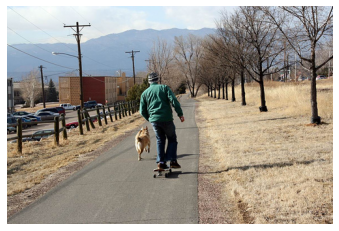

In [51]:
plt.imshow(I)
plt.axis('off')
coco_caps.showAnns(anns)
plt.show()